In [ ]:
# Import OS module
import os

# Imports
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Notebook magic
%matplotlib inline

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kesten10","key":"c81ec774ed2e18ca662da9889061193b"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          24651        685  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1666         41  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1447         36  1.0              
fatihb/coffee-quality-data-cqi

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:04<00:00, 22.7MB/s]
100% 2.70G/2.70G [02:04<00:00, 23.3MB/s]


In [ ]:
! mkdir dataset

In [ ]:
! unzip new-plant-diseases-dataset.zip -d dataset

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: datase

In [ ]:
import keras
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input , decode_predictions


In [ ]:
os.listdir("/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train") 


['Strawberry___Leaf_scorch',
 'Grape___healthy',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___healthy',
 'Tomato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Squash___Powdery_mildew',
 'Grape___Black_rot',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold',
 'Grape___Esca_(Black_Measles)',
 'Blueberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Potato___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Cherry_(including_sour)___healthy',
 'Tomato___Target_Spot',
 'Potato___Early_blight',
 'Strawberry___healthy',
 'Apple___healthy',
 'Peach___healthy',
 'Soybean___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn_(maize)___Common_rust_',
 'Tomato___Late_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Apple___Black_rot',
 'Apple___Apple_scab',
 'Tomato___Early_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Pepper,_bell___he

In [ ]:
#buna tekrar bakilacak

train_datagen = ImageDataGenerator(
    zoom_range= 0.5,
    shear_range= 0.3, 
    horizontal_flip= True,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", 
                                          target_size =(224, 224),
                                          batch_size=32
                                          )

val = val_datagen.flow_from_directory(directory = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", 
                                          target_size =(224, 224),
                                          batch_size=32
                                          )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img , label = train.next()

In [ ]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()
    

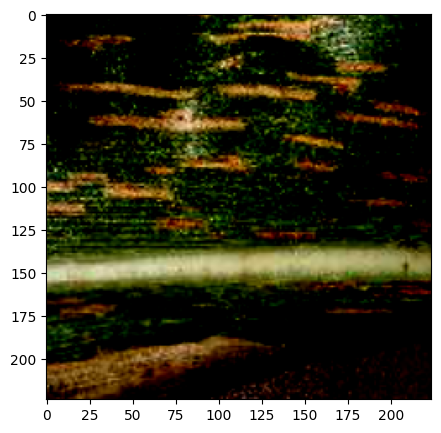

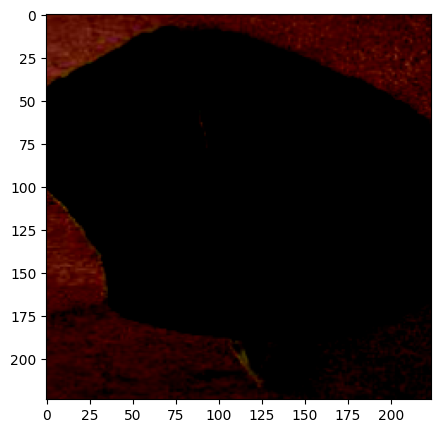

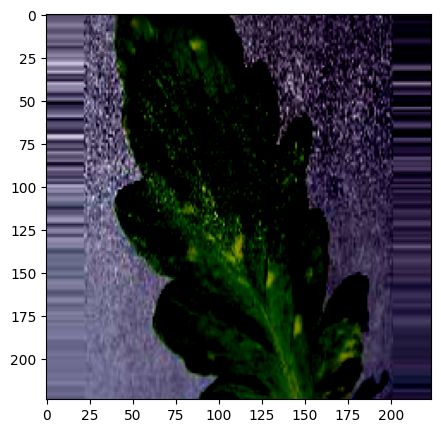

In [ ]:
plotImage(t_img[:3], label[:3])

Modelimiz




In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
import keras

In [ ]:
base_model = MobileNetV2(weights="imagenet", input_shape=(224, 224,3), include_top= False)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
x = Flatten()(base_model.output)

x = Dense(units= 38, activation='softmax')(x)

model = Model(base_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy , metrics= ['accuracy'])

In [ ]:
#early stopping

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5", 
                     monitor='val_accuracy', 
                     min_delta= 0.01, 
                     patience= 3, 
                     verbose=1, 
                     save_best_only= True)

cb = [es, mc]

In [ ]:
his = model.fit_generator(train, 
                          steps_per_epoch= 150, 
                          epochs= 30,
                          validation_data= val,
                          validation_steps= 150
)

<ipython-input-38-4611afdcb42f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/30
150/150 [==============================] - 74s 469ms/step - loss: 3.4456 - accuracy: 0.8612 - val_loss: 2.4190 - val_accuracy: 0.8913
Epoch 2/30
150/150 [==============================] - 79s 526ms/step - loss: 3.7705 - accuracy: 0.8612 - val_loss: 3.1363 - val_accuracy: 0.8796
Epoch 3/30
150/150 [==============================] - 70s 469ms/step - loss: 3.7713 - accuracy: 0.8573 - val_loss: 2.9957 - val_accuracy: 0.8767
Epoch 4/30
131/150 [=========================>....] - ETA: 7s - loss: 3.6618 - accuracy: 0.8657

KeyboardInterrupt: ignored

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

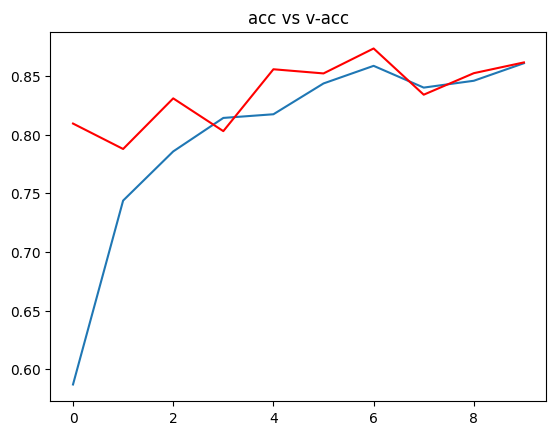

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

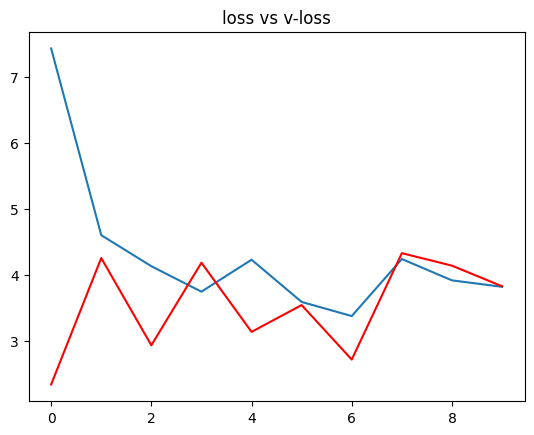

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from keras.models import load_model

#buna bakmak lazim
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate(val)[1]

print(f"The accuracy of our model is ={acc*100}%")

550/550 [==============================] - 48s 86ms/step - loss: 2.7316 - accuracy: 0.8717
The accuracy of our model is =87.17277646064758%


In [ ]:
ref = dict(zip (list(train.class_indices.values()) , list(train.class_indices.keys()) ))

In [ ]:
def prediction(path):

  img = load_img(path, target_size= (224, 224))
  
  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im , axis= 0)

  pred = np.argmax(model.predict(img) )

  print(f" the image belongs to { ref[pred] } ")

In [ ]:
path = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/0112c6b2-72cd-402b-89cd-ca052983403e___RS_L.Scorch 1161.JPG"

prediction(path)

1/1 [==============================] - 0s 47ms/step
 the image belongs to Strawberry___Leaf_scorch 


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('best_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'plant_disease_detection.tflite' , 'wb' ) 
file.write( tflmodel )

18391256

In [ ]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma